In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm

In [29]:
data = hddm.load_csv('HCP_wm_behavioral_data.csv')
data = data.rename(columns={'RT':'rt','accuracy':'response','subject':'subj_idx'})
data.rt = data.rt/1000
#data = data[data['response'] == 1] #Removing Error Trials
data = data[data['rt'] != 0] #Removing no-response trials

In [30]:
print data[data['task'] == '0bk'].rt.mean()
print data[data['task'] == '2bk'].rt.mean()

0.808953222201
1.01956957606


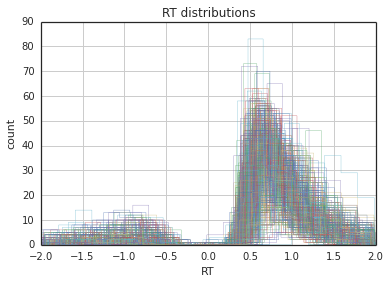

In [31]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

In [32]:
m_stim = hddm.HDDM(data, depends_on={'v': 'task',
                                    't': 'task',
                                    'a': 'task'})
m_stim.find_starting_values()
m_stim.sample(1000, burn=200,dbname='traces.db',db='pickle')
m_stim.save('hcp_wm')

 [-----------------100%-----------------] 1001 of 1000 complete in 1264.3 sec

Plotting a(0bk)
Plotting a(2bk)
Plotting v(0bk)
Plotting v(2bk)
Plotting t(0bk)
Plotting t(2bk)


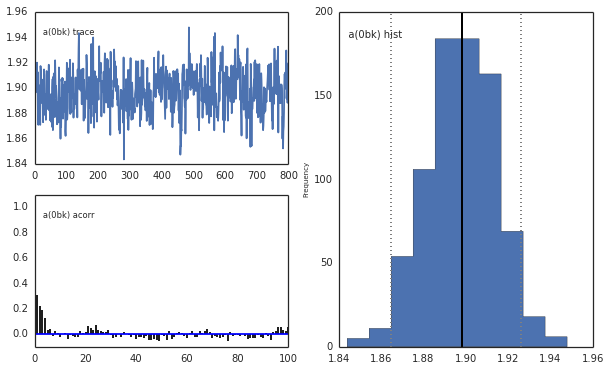

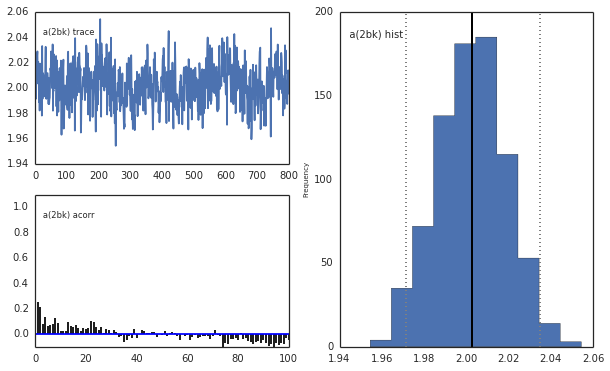

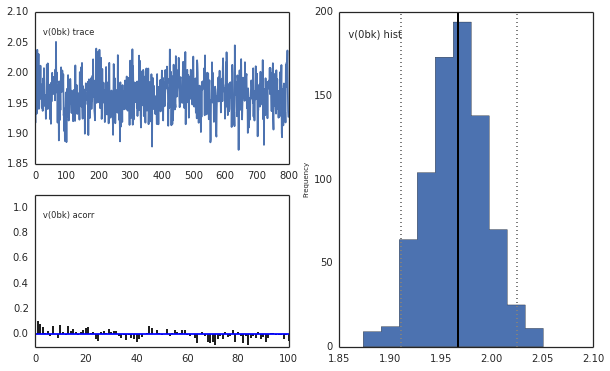

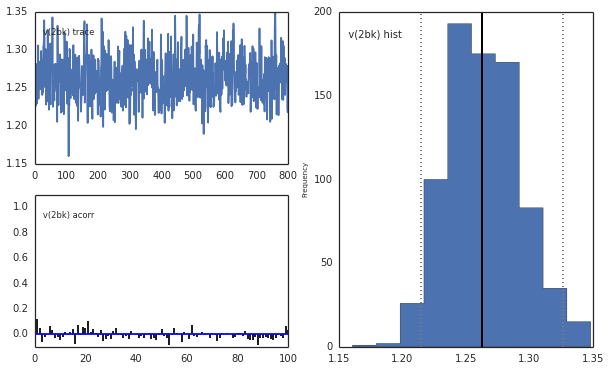

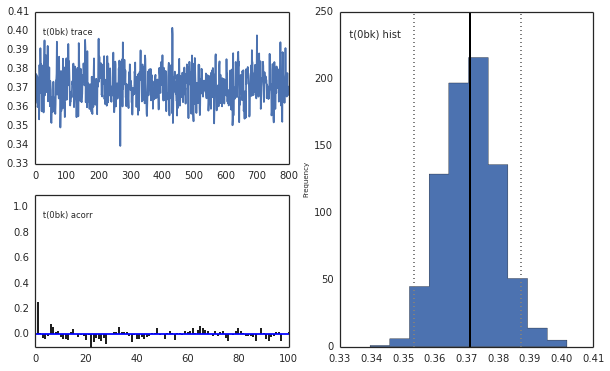

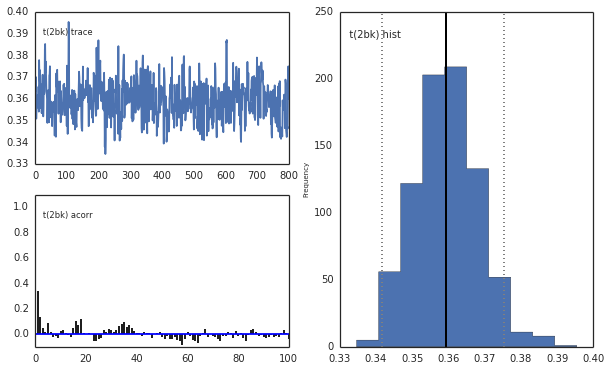

In [33]:
m_stim.plot_posteriors(['a','t','v'])

P(0bk > 2bk) =  1.0


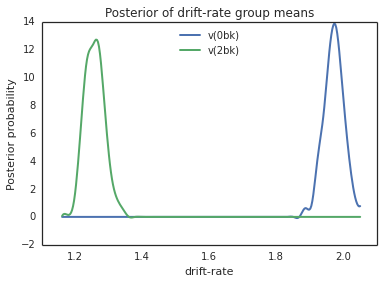

In [36]:
# Condition drift-rate posteriors
v_0, v_2 = m_stim.nodes_db.node[['v(0bk)','v(2bk)']]
hddm.analyze.plot_posterior_nodes([v_0, v_2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(0bk > 2bk) = ", (v_0.trace() > v_2.trace()).mean()

P(2bk > 0bk) =  1.0


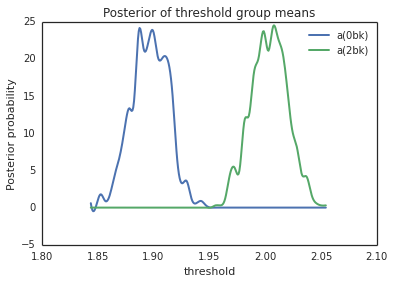

In [37]:
# Condition threshold posteriors
a_0, a_2 = m_stim.nodes_db.node[['a(0bk)','a(2bk)']]
hddm.analyze.plot_posterior_nodes([a_0, a_2])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print "P(2bk > 0bk) = ", (a_2.trace() > a_0.trace()).mean()

P(0bk > 2bk) =  0.85875


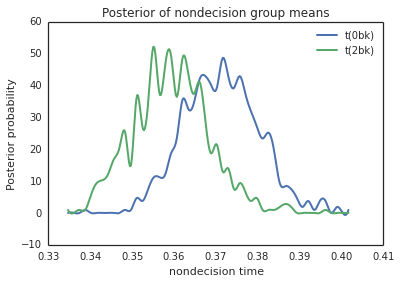

In [38]:
# Condition nondecision posteriors
t_0, t_2 = m_stim.nodes_db.node[['t(0bk)','t(2bk)']]
hddm.analyze.plot_posterior_nodes([t_0, t_2])
plt.xlabel('nondecision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision group means')

print "P(0bk > 2bk) = ", (t_0.trace() > t_2.trace()).mean()